# SIT764: EVAT PROJECT - ENVIRONMENT ANALYSIS

### Name: Burhanuddin Ujjainwala
### Student Number: s224802775
### Email: s224802775@deakin.edu.au

# Summary

This program estimates and compares carbon-dioxide (CO₂) savings when switching from internal-combustion vehicles to electric vehicles in Victoria, Australia. It begins by calculating the state’s electricity-grid emission factor and computing the grams of CO₂ emitted per kilometre for each EV. It then establishes baseline CO₂ emissions for petrol and diesel cars and combines both datasets to create every possible EV–ICE pair. Using these data, the script builds and evaluates multiple machine-learning models—linear regression, random forest, and gradient boosting—to predict potential CO₂ savings. Finally, it visualizes trends by EV brand, body style, release year, and fuel type replaced, helping identify where electric adoption delivers the greatest environmental benefit.

# Load Data

All required libraries are imported for data handling, modelling, and plotting.

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

# Load datasets
electric = pd.read_csv("C:/Users/ASUS/Downloads/project/Pure electric consumption.csv", delimiter=",")
diesel = pd.read_csv("C:/Users/ASUS/Downloads/project/Diesel consumption.csv", delimiter=",")
petrol98 = pd.read_csv("C:/Users/ASUS/Downloads/project/petrol98RON consumption.csv", delimiter=",")
petrol95 = pd.read_csv("C:/Users/ASUS/Downloads/project/petrol95RON consumption.csv", delimiter=",")
petrol91 = pd.read_csv("C:/Users/ASUS/Downloads/project/petrol91RON consumption.csv", delimiter=",")
greenhouse = pd.read_csv("C:/Users/ASUS/Downloads/project/greenhouse-and-energy-information-designated-generation-facility-2023-24-0.csv", delimiter=",")


# Data Wrangling

In [2]:
print(electric.describe())

       ModelReleaseYear  EngineDisplacement  FwdGearsNo  SideDoorNo  \
count         200.00000          200.000000  200.000000  200.000000   
mean         2023.18500            0.008000    0.985000    3.920000   
std             1.67175            0.113137    0.354121    0.379897   
min          2016.00000            0.000000    0.000000    2.000000   
25%          2022.00000            0.000000    1.000000    4.000000   
50%          2024.00000            0.000000    1.000000    4.000000   
75%          2024.00000            0.000000    1.000000    4.000000   
max          2025.00000            1.600000    2.000000    4.000000   

       SeatingCapacity  DrivingWheelsNo  CO2EmissionsCombined  \
count       200.000000       200.000000                 200.0   
mean          4.890000         2.620000                   0.0   
std           0.499145         0.927308                   0.0   
min           2.000000         2.000000                   0.0   
25%           5.000000         2.00

## Check Missing Data

In [5]:
count = electric.isnull().sum()
    
print(f"Number of missing values: {count}")
print(f"Total number of items: {len(electric)}")

Number of missing values: ModelReleaseYear                 0
Make                             0
ModelReleaseVersion            121
Model                            0
Variant                         11
EngineDisplacement               0
EngineConfiguration              0
EngineInduction                199
FwdGearsNo                       0
TransmissionTypeDescription     42
SideDoorNo                       0
SeatingCapacity                  0
BodyStyle                        0
DrivingWheelsNo                  0
FuelType                         0
CO2EmissionsCombined             0
CO2EmissionsUrban              200
CO2EmissionsExtraUrban         200
FuelConsumptionCombined          0
FuelConsumptionUrban           200
FuelConsumptionExtraUrban      200
EnergyConsumptionWhkm            0
ElectricRangeKm                  0
AirPollutionStandard             0
StationaryNoiseData            191
TestSpeed                      180
IsCurrentModel                   0
ModelEndYear                 

In [7]:
count = diesel.isnull().sum()
    
print(f"Number of missing values: {count}")
print(f"Total number of items: {len(diesel)}")

Number of missing values: ModelReleaseYear                 0
Make                             0
ModelReleaseVersion             79
Model                            0
Variant                          9
EngineDisplacement               0
EngineConfiguration              0
EngineInduction                  0
FwdGearsNo                       0
TransmissionTypeDescription      0
SideDoorNo                       0
SeatingCapacity                  0
BodyStyle                        0
DrivingWheelsNo                  0
FuelType                         0
CO2EmissionsCombined             0
CO2EmissionsUrban                0
CO2EmissionsExtraUrban           0
FuelConsumptionCombined          0
FuelConsumptionUrban             0
FuelConsumptionExtraUrban        0
EnergyConsumptionWhkm          200
ElectricRangeKm                200
AirPollutionStandard             0
StationaryNoiseData              0
TestSpeed                        0
IsCurrentModel                   0
ModelEndYear                 

In [9]:
count = petrol98.isnull().sum()
    
print(f"Number of missing values: {count}")
print(f"Total number of items: {len(petrol98)}")

Number of missing values: ModelReleaseYear                 0
Make                             0
ModelReleaseVersion             64
Model                            0
Variant                         16
EngineDisplacement               0
EngineConfiguration              0
EngineInduction                  0
FwdGearsNo                       0
TransmissionTypeDescription      0
SideDoorNo                       0
SeatingCapacity                  0
BodyStyle                        0
DrivingWheelsNo                  0
FuelType                         0
CO2EmissionsCombined             0
CO2EmissionsUrban                0
CO2EmissionsExtraUrban           0
FuelConsumptionCombined          0
FuelConsumptionUrban             0
FuelConsumptionExtraUrban        2
EnergyConsumptionWhkm          200
ElectricRangeKm                198
AirPollutionStandard             0
StationaryNoiseData              0
TestSpeed                        0
IsCurrentModel                   0
ModelEndYear                 

In [11]:
count = petrol95.isnull().sum()
    
print(f"Number of missing values: {count}")
print(f"Total number of items: {len(petrol95)}")

Number of missing values: ModelReleaseYear                 0
Make                             0
ModelReleaseVersion             89
Model                            0
Variant                          3
EngineDisplacement               0
EngineConfiguration              0
EngineInduction                  0
FwdGearsNo                       0
TransmissionTypeDescription      0
SideDoorNo                       0
SeatingCapacity                  0
BodyStyle                        0
DrivingWheelsNo                  0
FuelType                         0
CO2EmissionsCombined             0
CO2EmissionsUrban                3
CO2EmissionsExtraUrban           1
FuelConsumptionCombined          0
FuelConsumptionUrban             3
FuelConsumptionExtraUrban        6
EnergyConsumptionWhkm          197
ElectricRangeKm                192
AirPollutionStandard             0
StationaryNoiseData              0
TestSpeed                        0
IsCurrentModel                   0
ModelEndYear                 

In [13]:
count = petrol91.isnull().sum()
    
print(f"Number of missing values: {count}")
print(f"Total number of items: {len(petrol91)}")

Number of missing values: ModelReleaseYear                 0
Make                             0
ModelReleaseVersion            110
Model                            0
Variant                         15
EngineDisplacement               0
EngineConfiguration              0
EngineInduction                  1
FwdGearsNo                       0
TransmissionTypeDescription      0
SideDoorNo                       0
SeatingCapacity                  0
BodyStyle                        0
DrivingWheelsNo                  0
FuelType                         0
CO2EmissionsCombined             0
CO2EmissionsUrban                0
CO2EmissionsExtraUrban           0
FuelConsumptionCombined          0
FuelConsumptionUrban             0
FuelConsumptionExtraUrban        0
EnergyConsumptionWhkm          200
ElectricRangeKm                200
AirPollutionStandard             0
StationaryNoiseData              0
TestSpeed                        0
IsCurrentModel                   0
ModelEndYear                 

In [15]:
count = greenhouse.isnull().sum()
    
print(f"Number of missing values: {count}")
print(f"Total number of items: {len(greenhouse)}")

Number of missing values: Reporting entity                     0
Facility name                        0
Type                                 0
State                                0
Electricity production (GJ)          0
Electricity production (MWh)         0
Total scope 1 emissions (t CO2-e)    0
Total scope 2 emissions (t CO2-e)    0
Total emissions (t CO2-e)            0
Emission intensity (t CO2-e/MWh)     0
Grid connected                       0
Grid                                 0
Primary fuel                         0
Important notes                      0
dtype: int64
Total number of items: 775


In [181]:
# Drop columns with any null values
df = [electric, diesel, petrol98, petrol95, petrol91, greenhouse]
df = [df.dropna(axis=1) for df in df]

# Assign back to original variables
electric, diesel, petrol98, petrol95, petrol91, greenhouse = df

## Displaying Datatypes

In [183]:
electric.dtypes

ModelReleaseYear             int64
Make                        object
Model                       object
EngineDisplacement         float64
EngineConfiguration         object
FwdGearsNo                   int64
SideDoorNo                   int64
SeatingCapacity              int64
BodyStyle                   object
DrivingWheelsNo              int64
FuelType                    object
CO2EmissionsCombined         int64
FuelConsumptionCombined      int64
EnergyConsumptionWhkm        int64
ElectricRangeKm              int64
AirPollutionStandard        object
IsCurrentModel              object
ModelEndYear                 int64
FuelLifeCycleCO2             int64
AnnualTailpipeCO2            int64
AnnualFuelCost               int64
EV_gCO2_per_km             float64
dtype: object

In [19]:
petrol98.dtypes

ModelReleaseYear                 int64
Make                            object
ModelReleaseVersion             object
Model                           object
Variant                         object
EngineDisplacement              object
EngineConfiguration             object
EngineInduction                 object
FwdGearsNo                      object
TransmissionTypeDescription     object
SideDoorNo                       int64
SeatingCapacity                 object
BodyStyle                       object
DrivingWheelsNo                 object
FuelType                        object
CO2EmissionsCombined             int64
CO2EmissionsUrban                int64
CO2EmissionsExtraUrban         float64
FuelConsumptionCombined        float64
FuelConsumptionUrban           float64
FuelConsumptionExtraUrban      float64
EnergyConsumptionWhkm          float64
ElectricRangeKm                 object
AirPollutionStandard            object
StationaryNoiseData            float64
TestSpeed                

In [21]:
petrol95.dtypes

ModelReleaseYear                 int64
Make                            object
ModelReleaseVersion             object
Model                           object
Variant                         object
EngineDisplacement              object
EngineConfiguration             object
EngineInduction                 object
FwdGearsNo                      object
TransmissionTypeDescription     object
SideDoorNo                       int64
SeatingCapacity                 object
BodyStyle                       object
DrivingWheelsNo                 object
FuelType                        object
CO2EmissionsCombined             int64
CO2EmissionsUrban              float64
CO2EmissionsExtraUrban         float64
FuelConsumptionCombined        float64
FuelConsumptionUrban           float64
FuelConsumptionExtraUrban      float64
EnergyConsumptionWhkm          float64
ElectricRangeKm                 object
AirPollutionStandard            object
StationaryNoiseData            float64
TestSpeed                

In [23]:
petrol91.dtypes

ModelReleaseYear                 int64
Make                            object
ModelReleaseVersion             object
Model                           object
Variant                         object
EngineDisplacement             float64
EngineConfiguration             object
EngineInduction                 object
FwdGearsNo                       int64
TransmissionTypeDescription     object
SideDoorNo                       int64
SeatingCapacity                  int64
BodyStyle                       object
DrivingWheelsNo                  int64
FuelType                        object
CO2EmissionsCombined             int64
CO2EmissionsUrban                int64
CO2EmissionsExtraUrban           int64
FuelConsumptionCombined        float64
FuelConsumptionUrban           float64
FuelConsumptionExtraUrban      float64
EnergyConsumptionWhkm          float64
ElectricRangeKm                float64
AirPollutionStandard            object
StationaryNoiseData            float64
TestSpeed                

In [25]:
diesel.dtypes

ModelReleaseYear                 int64
Make                            object
ModelReleaseVersion             object
Model                           object
Variant                         object
EngineDisplacement             float64
EngineConfiguration             object
EngineInduction                 object
FwdGearsNo                       int64
TransmissionTypeDescription     object
SideDoorNo                       int64
SeatingCapacity                  int64
BodyStyle                       object
DrivingWheelsNo                  int64
FuelType                        object
CO2EmissionsCombined             int64
CO2EmissionsUrban                int64
CO2EmissionsExtraUrban           int64
FuelConsumptionCombined        float64
FuelConsumptionUrban           float64
FuelConsumptionExtraUrban      float64
EnergyConsumptionWhkm          float64
ElectricRangeKm                float64
AirPollutionStandard            object
StationaryNoiseData            float64
TestSpeed                

In [27]:
greenhouse.dtypes

Reporting entity                     object
Facility name                        object
Type                                 object
State                                object
Electricity production (GJ)          object
Electricity production (MWh)         object
Total scope 1 emissions (t CO2-e)    object
Total scope 2 emissions (t CO2-e)    object
Total emissions (t CO2-e)            object
Emission intensity (t CO2-e/MWh)     object
Grid connected                       object
Grid                                 object
Primary fuel                         object
Important notes                      object
dtype: object

## VIC Emission Factor

Filters greenhouse data to Victoria, converts text columns to numeric, removes missing values, and computes the grid’s CO₂ intensity in kg/kWh. EV emissions depend on the electricity grid; this gives a conversion factor to estimate EV emissions from electricity use.

In [185]:
# Ensure all columns are visible when printing DataFrames
pd.set_option("display.max_columns", None)

# Filter the greenhouse dataset to include only records for Victoria (VIC)
vic = greenhouse[greenhouse['State'] == 'VIC'].copy()

# Convert total emissions column to numeric by removing commas and coercing errors to NaN
vic['Total emissions (t CO2-e)'] = pd.to_numeric(
    vic['Total emissions (t CO2-e)'].str.replace(',', ''), errors='coerce'
)

# Convert electricity production column to numeric by removing commas and coercing errors to NaN
vic['Electricity production (MWh)'] = pd.to_numeric(
    vic['Electricity production (MWh)'].str.replace(',', ''), errors='coerce'
)

# Drop rows with missing values in critical columns
vic = vic.dropna(subset=['Total emissions (t CO2-e)', 'Electricity production (MWh)'])

# Calculate Victoria's total emission intensity in tonnes of CO₂ per MWh of electricity
emission_intensity_t_per_mwh = vic['Total emissions (t CO2-e)'].sum() / vic['Electricity production (MWh)'].sum()

# Convert tonnes/MWh to kg/kWh (1 tonne/MWh = 1 kg/kWh) for easier downstream calculations
emission_factor_kg_per_kwh = emission_intensity_t_per_mwh

# Print the calculated grid emission factor for Victoria
print(f"Victoria Grid Emission Factor: {emission_factor_kg_per_kwh:.3f} kg CO₂/kWh")

Victoria Grid Emission Factor: 0.848 kg CO₂/kWh


## EV gCO₂/km

This code calculates the estimated CO₂ emissions per kilometre for each electric vehicle (EV) based on its electricity consumption and the grid’s emission factor.

In [167]:
# Calculate EV emissions in grams of CO₂ per km.
# 1) Convert Wh/km to kWh/km by dividing by 1000.
# 2) Multiply by Victoria's grid emission factor (kg CO₂/kWh) to get kg CO₂/km.
# 3) Multiply by 1000 to convert kg to grams of CO₂/km.
electric['EV_gCO2_per_km'] = (electric['EnergyConsumptionWhkm'] / 1000) * emission_factor_kg_per_kwh * 1000

# Display a sample of key columns to verify the new emissions calculation
print("EV emissions sample:\n", electric[['Make','Model','EnergyConsumptionWhkm','EV_gCO2_per_km']].head())

EV emissions sample:
      Make     Model  EnergyConsumptionWhkm  EV_gCO2_per_km
0     BYD   DOLPHIN                    126      106.836710
1   Lexus   UX 300e                    128      108.532531
2  Toyota      bZ4X                    128      108.532531
3      MG       MG4                    130      110.228352
4   Chery  Omoda E5                    130      110.228352


## Fuel CO₂ Baseline

Defines a helper function to calculate tailpipe CO₂ for petrol and diesel cars using their fuel consumption and standard emission factors. This will create a consistent baseline to compare ICE emissions with EV emissions.

In [177]:
def add_co2_baseline(df, fuel_type):

#Add a baseline CO₂ emissions column for internal-combustion engine (ICE) vehicles.
#Uses standard emission factors:
#  * Petrol: 23.2 g CO₂ per km per litre of fuel consumed
#  * Diesel: 26.5 g CO₂ per km per litre of fuel consumed
#Also records the fuel type for later analysis.

    if fuel_type.lower().startswith("petrol"):
        # Calculate petrol baseline emissions
        df['ICE_CO2_Baseline'] = df['FuelConsumptionCombined'] * 23.2
    elif fuel_type.lower().startswith("diesel"):
        # Calculate diesel baseline emissions
        df['ICE_CO2_Baseline'] = df['FuelConsumptionCombined'] * 26.5
    df['FuelType'] = fuel_type   # Tag each record with its specific fuel type
    return df

# Apply baseline calculation to each ICE dataset by fuel type
petrol91 = add_co2_baseline(petrol91, "Petrol91")
petrol95 = add_co2_baseline(petrol95, "Petrol95")
petrol98 = add_co2_baseline(petrol98, "Petrol98")
diesel   = add_co2_baseline(diesel, "Diesel")

# Combine all processed ICE datasets into one DataFrame for downstream comparisons
ice_all = pd.concat([petrol91, petrol95, petrol98, diesel], ignore_index=True)
print("ICE combined sample:\n", ice_all.head())

ICE combined sample:
    ModelReleaseYear    Make ModelReleaseVersion  Model Variant  \
0              2017  Suzuki                  AZ  Swift      GL   
1              2017  Suzuki                 NaN  Ignis      GL   
2              2017  Suzuki                  AZ  Swift      GL   
3              2017  Suzuki                 NaN  Ignis      GL   
4              2017  Suzuki                 NaN  Ignis     GLX   

  EngineDisplacement EngineConfiguration EngineInduction FwdGearsNo  \
0                1.2                4cyl          Normal          5   
1                1.2                4cyl          Normal          5   
2                1.2                4cyl          Normal          1   
3                1.2                4cyl          Normal          1   
4                1.2                4cyl          Normal          1   

  TransmissionTypeDescription  SideDoorNo SeatingCapacity BodyStyle  \
0                      Manual           4               5     Hatch   
1           

## Cartesian Join

Builds every EV–ICE pair by a cross join so each electric model is compared with every ICE model. This will enable exploration of CO₂ savings across all possible replacement scenarios.

In [171]:
# Create a full pairwise (Cartesian) join between EV and ICE datasets
cartesian_df = (
    electric.assign(key=1)     # Add a dummy key column to every EV row
    .merge(
        ice_all.assign(key=1), # Add the same dummy key to every ICE row
        on="key",              # Merge on the dummy key so every EV pairs with every ICE
        suffixes=("_EV", "_ICE")
    )
    .drop("key", axis=1)       # Remove the temporary key column after merging
)

# Display the shape to confirm total number of EV–ICE combinations
print("Cartesian join shape:", cartesian_df.shape)

Cartesian join shape: (160000, 64)


## Feature Engineering

Adds year difference, calculates the target variable (CO2_saving = ICE – EV emissions), and selects relevant feature columns for modelling.

In [173]:
# Calculate the difference in model release year between the electric vehicle (EV) and the internal combustion engine (ICE) vehicle
cartesian_df["YearDiff"] = cartesian_df["ModelReleaseYear_EV"] - cartesian_df["ModelReleaseYear_ICE"]

# Compute the CO2 savings for each EV vs ICE comparison
# This is the difference between the ICE baseline emissions and the EV's actual gCO2 per km
cartesian_df["CO2_saving"] = cartesian_df["ICE_CO2_Baseline"] - cartesian_df["EV_gCO2_per_km"]

# Define the feature set for modeling
# Includes vehicle make, body style, ICE fuel type, year difference, and ICE baseline CO2 emissions

# Features
X = cartesian_df[["Make_EV","Make_ICE","BodyStyle_EV","BodyStyle_ICE","FuelType_ICE","YearDiff","ICE_CO2_Baseline"]]

# Define the target variable
# CO2 savings represents how much CO2 an EV saves compared to its ICE counterpart
y = cartesian_df["CO2_saving"]

# Models Selection

This block prepares and compares three machine-learning models to predict CO₂ savings. A shared preprocessor first one-hot encodes categorical features so all models can handle vehicle makes, body styles, and fuel types numerically. Three pipelines are then defined: Linear Regression for a simple baseline, Random Forest for capturing complex non-linear patterns, and Gradient Boosting for high-accuracy, sequential tree boosting.

## Linear Regression

Creates a preprocessing + Linear Regression pipeline with one-hot encoding for categorical features. Performs 5-fold cross-validation to report R² and MAE scores.

In [116]:
# Build a pipeline: OneHotEncode categorical features + Linear Regression
lr_preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

lr_pipeline = Pipeline([
    ("preprocessor", lr_preprocessor),
    ("model", LinearRegression())
])

In [118]:
# Cross-validated scores for Linear Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_r2_scores = cross_val_score(lr_pipeline, X, y, cv=kf, scoring="r2")
lr_mae_scores = -cross_val_score(lr_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error")

print("=== Linear Regression (5-fold CV) ===")
print(f"R² scores: {lr_r2_scores}")
print(f"Mean R²: {np.mean(lr_r2_scores):.3f} | Std: {np.std(lr_r2_scores):.3f}")
print(f"MAE scores (g/km): {lr_mae_scores}")
print(f"Mean MAE: {np.mean(lr_mae_scores):.3f} g/km")

=== Linear Regression (5-fold CV) ===
R² scores: [0.92491791 0.92514299 0.92708968 0.92477188 0.92554557]
Mean R²: 0.925 | Std: 0.001
MAE scores (g/km): [6.73239846 6.81081442 6.73240045 6.80484598 6.7520074 ]
Mean MAE: 6.766 g/km


## Random Forest

Builds a Random Forest pipeline with the same preprocessing. Cross-validates the Random Forest and prints R² and MAE.

In [129]:
# Build a pipeline: OneHotEncode categorical features + Random Forest
rf_preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

rf_pipeline = Pipeline([
    ("preprocessor", rf_preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])

In [131]:
# Cross-validated scores for Random Forest
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_r2_scores = cross_val_score(rf_pipeline, X, y, cv=kf, scoring="r2")
rf_mae_scores = -cross_val_score(rf_pipeline, X, y, cv=kf, scoring="neg_mean_absolute_error")

print("\n=== Random Forest (5-fold CV) ===")
print(f"R² scores: {rf_r2_scores}")
print(f"Mean R²: {np.mean(rf_r2_scores):.3f} | Std: {np.std(rf_r2_scores):.3f}")
print(f"MAE scores (g/km): {rf_mae_scores}")
print(f"Mean MAE: {np.mean(rf_mae_scores):.3f} g/km")


=== Random Forest (5-fold CV) ===
R² scores: [0.94550744 0.9476198  0.94857517 0.94636868 0.94717745]
Mean R²: 0.947 | Std: 0.001
MAE scores (g/km): [5.38430912 5.39282511 5.34581978 5.4255368  5.3624241 ]
Mean MAE: 5.382 g/km


## Gradient Boosting

Defines a Gradient Boosting Regressor pipeline.Cross-validates Gradient Boosting, reporting R² and MAE.

In [83]:
categorical_cols = ["Make_EV","Make_ICE","BodyStyle_EV","BodyStyle_ICE","FuelType_ICE"]

preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

gb_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=42))
])

In [85]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_r2 = cross_val_score(gb_model, X, y, cv=kf, scoring="r2")
scores_mae = cross_val_score(gb_model, X, y, cv=kf, scoring="neg_mean_absolute_error")

print(f"Cross-validated R² scores: {scores_r2}")
print(f"Mean R²: {scores_r2.mean():.3f}")
print(f"Cross-validated MAE scores: {-scores_mae}")
print(f"Mean MAE: {-scores_mae.mean():.3f}")

Cross-validated R² scores: [0.92535116 0.92515103 0.92779109 0.92546673 0.92677564]
Mean R²: 0.926
Cross-validated MAE scores: [7.01315429 7.09637045 6.99809684 7.05867436 6.97247732]
Mean MAE: 7.028


### Model Selected: Gradient Boosting

## Impact Analysis

Fits Gradient Boosting on all data, predicts CO₂ savings, and aggregates results by EV make, body style, year, and ICE fuel type. This generates actionable insights about which EV types give the most environmental benefit.

In [175]:
# Fit the gradient boosting model on the full dataset
# X contains the features, y is the target CO2 savings
gb_model.fit(X, y)

# Use the fitted model to predict CO2 savings for each EV vs ICE comparison
cartesian_df["Predicted_CO2_Savings"] = gb_model.predict(X)


# Environmental Impact Analysis
# Calculate the average predicted CO2 savings by EV manufacturer
# This shows which EV makes tend to provide the most CO2 reduction
ev_impact = cartesian_df.groupby("Make_EV")["Predicted_CO2_Savings"].mean().sort_values(ascending=False)

# Calculate the average predicted CO2 savings by EV body style
# Helps identify which body styles are more efficient in reducing emissions
bodystyle_impact = cartesian_df.groupby("BodyStyle_EV")["Predicted_CO2_Savings"].mean().sort_values(ascending=False)

# Calculate the average predicted CO2 savings by EV release year
# Can reveal whether newer models are generally more efficient
year_impact = cartesian_df.groupby("ModelReleaseYear_EV")["Predicted_CO2_Savings"].mean().sort_values(ascending=False)

# Calculate the average predicted CO2 savings based on ICE vehicle fuel type
# Useful to see which ICE fuel types are offset the most by switching to EVs
fueltype_impact = cartesian_df.groupby("FuelType_ICE")["Predicted_CO2_Savings"].mean().sort_values(ascending=False)

# Print the top EV manufacturers by predicted CO2 savings
print("Top EV makes by savings:\n", ev_impact.head())

Top EV makes by savings:
 Make_EV
Chery     37.375237
Toyota    35.877847
Lexus     30.961791
Subaru    30.379654
Tesla     27.338958
Name: Predicted_CO2_Savings, dtype: float64


## Visualizations

Plots bar and line charts for savings by EV brand, body style, release year, and ICE fuel type.

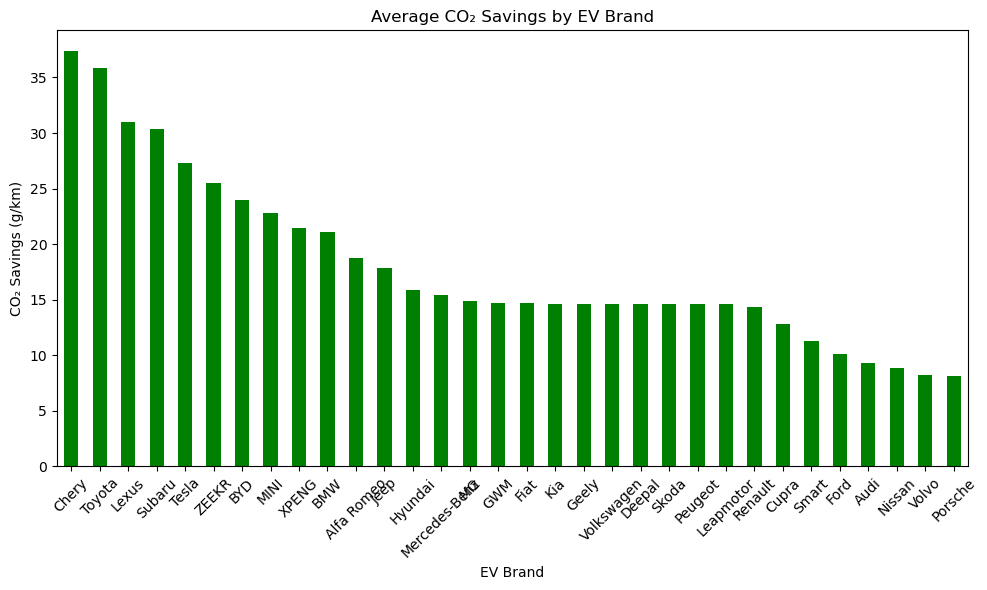

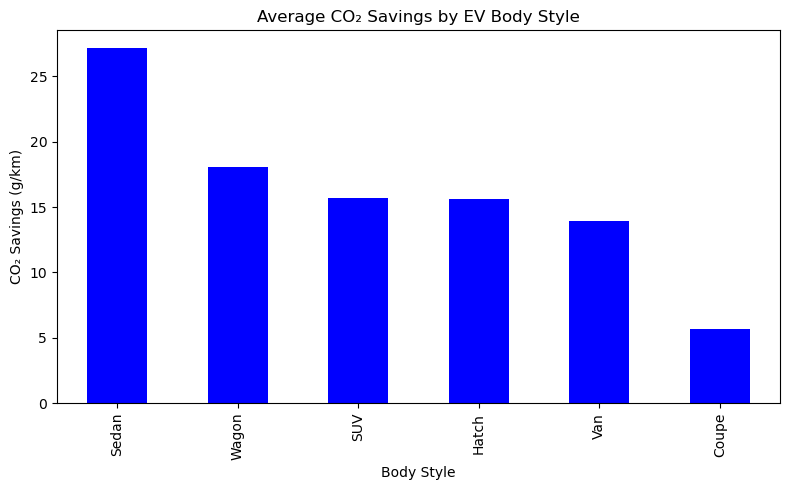

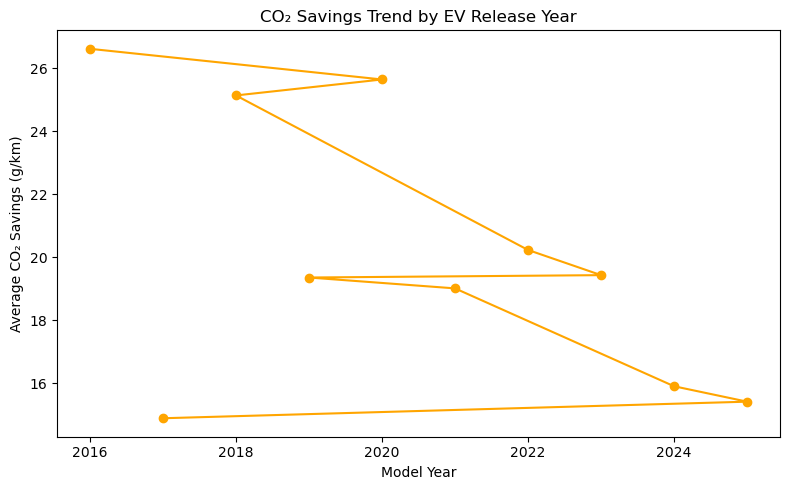

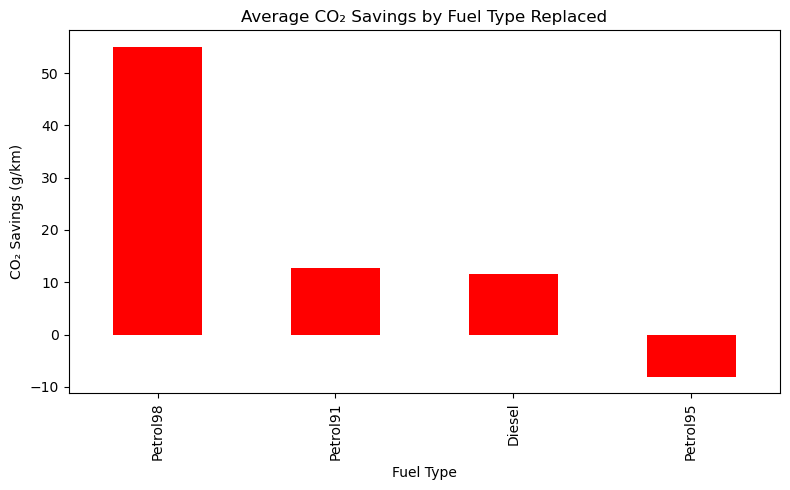

In [94]:
# EV Brand
plt.figure(figsize=(10,6))
ev_impact.plot(kind='bar', color='green')
plt.title("Average CO₂ Savings by EV Brand")
plt.ylabel("CO₂ Savings (g/km)")
plt.xlabel("EV Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# EV Body Style
plt.figure(figsize=(8,5))
bodystyle_impact.plot(kind='bar', color='blue')
plt.title("Average CO₂ Savings by EV Body Style")
plt.ylabel("CO₂ Savings (g/km)")
plt.xlabel("Body Style")
plt.tight_layout()
plt.show()

# Release Year
plt.figure(figsize=(8,5))
year_impact.plot(kind='line', marker='o', color='orange')
plt.title("CO₂ Savings Trend by EV Release Year")
plt.ylabel("Average CO₂ Savings (g/km)")
plt.xlabel("Model Year")
plt.tight_layout()
plt.show()

# Fuel Type
plt.figure(figsize=(8,5))
fueltype_impact.plot(kind='bar', color='red')
plt.title("Average CO₂ Savings by Fuel Type Replaced")
plt.ylabel("CO₂ Savings (g/km)")
plt.xlabel("Fuel Type")
plt.tight_layout()
plt.show()

# Conclusion

The analysis shows that replacing internal combustion engine vehicles with electric vehicles (EVs) can deliver significant CO₂ savings. Among brands, Chery, Toyota, Lexus, Subaru, and Tesla demonstrate the highest average CO₂ reductions, while sedans outperform other body styles in emissions savings. The trend by release year indicates some decline in savings for newer EV models, suggesting improvements in ICE efficiency or variations in grid emission factors. Furthermore, replacing high-emission fuels such as Petrol98 yields the greatest benefits, while Petrol95 replacement shows limited or even negative savings. Overall, the results emphasize that both EV design choices (brand, body style) and the type of fuel being displaced strongly influence environmental gains, underlining EV adoption as an impactful strategy for reducing transport-related emissions.